<a href="https://colab.research.google.com/github/escape13/deepfried/blob/master/IntroTorch/DigitsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F

from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,), (0.5,))])
trainset = datasets.MNIST('MNIST_data/', transform=transform, download=True, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## Calculate loss using Cross Entropy Loss

In [21]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

dataiter = iter(trainloader)
images, labels = dataiter.next()

images = images.view(images.shape[0], -1)

criterion = nn.CrossEntropyLoss()

logits = model(images)
loss = criterion(logits, labels)
loss

tensor(2.2711, grad_fn=<NllLossBackward>)

## Another way of calculating loss

In [23]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)
loss

tensor(2.3243, grad_fn=<NllLossBackward>)

## Actually training the model

In [26]:
from torch import optim
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
print(len(trainloader))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

938
Training loss: 1.9045484016444891
Training loss: 0.8366987140321019
Training loss: 0.523688833469521
Training loss: 0.4273736515977998
Training loss: 0.3834564200183476


##Testing the trained network

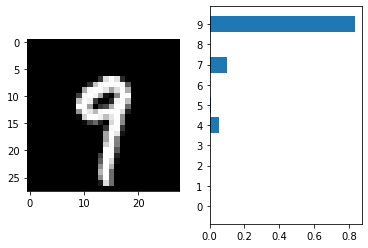

In [78]:
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
plt.subplot(1, 2, 1)
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.barh(range(10), ps.numpy().squeeze())
plt.yticks(range(10))
plt.show()